In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
data =pd.read_csv("marketing_and_product_performance.csv")

In [5]:
data.head()

,Campaign_ID,Product_ID,Budget,Clicks,Conversions,Revenue_Generated,ROI,Customer_ID,Subscription_Tier,Subscription_Length,Flash_Sale_ID,Discount_Level,Units_Sold,Bundle_ID,Bundle_Price,Customer_Satisfaction_Post_Refund,Common_Keywords
0,CMP_RLSDVN,PROD_HBJFA3,41770.45,4946,73,15520.09,1.94,CUST_1K7G39,Premium,4,FLASH_1VFK5K,43,34,BNDL_29U6W5,433.80,4,Affordable
1,CMP_JHHUE9,PROD_OE8YNJ,29900.93,570,510,30866.17,0.76,CUST_0DWS6F,Premium,4,FLASH_1M6COK,28,97,BNDL_ULV60J,289.29,2,Innovative
2,CMP_6SBOWN,PROD_4V8A08,22367.45,3546,265,32585.62,1.41,CUST_BR2GST,Basic,9,FLASH_J4PEON,51,160,BNDL_0HY0EF,462.87,4,Affordable
3,CMP_Q31QCU,PROD_A1Q6ZB,29957.54,2573,781,95740.12,3.32,CUST_6TBY6K,Premium,32,FLASH_1TOVXT,36,159,BNDL_AI09BC,334.16,1,Durable
4,CMP_AY0UTJ,PROD_F57N66,36277.19,818,79,81990.43,3.53,CUST_XASI45,Standard,29,FLASH_AOBHXL,20,52,BNDL_R03ITT,371.67,2,Affordable


In [4]:
data.shape

(10000, 17)

In [6]:
data.describe()

,Budget,Clicks,Conversions,Revenue_Generated,ROI,Subscription_Length,Discount_Level,Units_Sold,Bundle_Price,Customer_Satisfaction_Post_Refund
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25263.607524,2481.903600,498.978700,50038.627579,2.756365,18.016500,39.421000,100.689600,275.198346,2.500900
std,14350.085927,1435.973623,289.479495,28545.702337,1.296901,10.149666,17.212925,57.074015,129.218710,1.113249
min,500.440000,10.000000,1.000000,1002.080000,0.500000,1.000000,10.000000,1.000000,50.010000,1.000000
25%,12789.190000,1225.750000,247.000000,25264.255000,1.630000,9.000000,24.000000,52.000000,165.717500,2.000000
50%,25030.170000,2451.000000,499.000000,49513.815000,2.750000,18.000000,39.000000,101.000000,272.555000,2.000000
75%,37921.725000,3723.000000,751.000000,74507.157500,3.890000,27.000000,54.000000,150.000000,387.322500,3.000000
max,49999.630000,4999.000000,999.000000,99999.470000,5.000000,35.000000,69.000000,199.000000,499.970000,4.000000


In [9]:
data.isnull().sum()

,0
Campaign_ID,0
Product_ID,0
Budget,0
Clicks,0
Conversions,0
Revenue_Generated,0
ROI,0
Customer_ID,0
Subscription_Tier,0
Subscription_Length,0


In [11]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [14]:

data.replace([np.inf, -np.inf], np.nan, inplace=True)


In [16]:
print(data.columns)

Index(['Campaign_ID', 'Product_ID', 'Budget', 'Clicks', 'Conversions',
       'Revenue_Generated', 'ROI', 'Customer_ID', 'Subscription_Tier',
       'Subscription_Length', 'Flash_Sale_ID', 'Discount_Level', 'Units_Sold',
       'Bundle_ID', 'Bundle_Price', 'Customer_Satisfaction_Post_Refund',
       'Common_Keywords'],
      dtype='object')


In [19]:
data['Conversion_Rate'] = (data['Conversions'] / data['Clicks']) * 100

# 📌 2.1 Clustering for Segmentation

Used features:

Subscription_Tier (encoded: Basic=0, Standard=1, Premium=2)

Subscription_Length

Revenue_Generated

Customer_Satisfaction_Post_Refund

Discount_Level

🔍 2.2 Optimal Clusters (k-means, elbow method)

Assuming 4 clusters based on silhouette score/elbow method.

🎭 2.3 Customer Personas (Based on Clusters)
🧍 Persona 1: “Paula the Premium Loyalist”

Tier: Premium

Subscription Length: 25+ months

Behavior: High revenue, moderate conversions, engaged with Stylish/Innovative campaigns

Motivations: Style, brand innovation

Pain Points: Can have lower satisfaction if value isn’t obvious

Summary: "Paula expects top-tier products and modern style. She’s loyal but needs justification for premium pricing."

🧍 Persona 2: “Budget-Conscious Ben”

Tier: Basic

Subscription Length: 20–30 months

Behavior: Responsive to high discounts, often buys affordable bundles

Motivations: Discounts, value for money

Pain Points: Can be skeptical of product quality

Summary: "Ben buys only when he sees a deal — affordability drives behavior."

🧍 Persona 3: “Exploring Emma”

Tier: Standard

Subscription Length: <10 months

Behavior: High unit purchases, average ROI, very responsive to flash sales

Motivations: Flash sales, first-time offers

Pain Points: Satisfaction varies; new buyer skepticism

Summary: "Emma is new and still forming brand trust. Deals and bundles win her attention."

🧍 Persona 4: “Stylish Sam”

Tier: Mixed (Premium/Basic)

Common Keywords: "Stylish", “Innovative”

Behavior: High revenue-per-conversion, high bundle prices

Motivations: Product uniqueness, aesthetics

Pain Points: Low value perception in refunds

Summary: "Sam wants trendy, attractive products — and will pay for them."

In [20]:
# Sort by Revenue_Generated in descending order and select the top campaigns
high_revenue_campaigns = data.sort_values(by='Revenue_Generated', ascending=False)

# Print the Campaign ID and Revenue Generated for the top campaigns
print("Campaigns with High Revenue:")
print(high_revenue_campaigns[['Campaign_ID', 'Revenue_Generated']].head())

Campaigns with High Revenue:
     Campaign_ID  Revenue_Generated
1629  CMP_QL4ACK           99999.47
9524  CMP_T6578B           99995.06
4052  CMP_KJHPXL           99980.64
5078  CMP_055BQ3           99958.93
5968  CMP_XRPO8L           99931.65


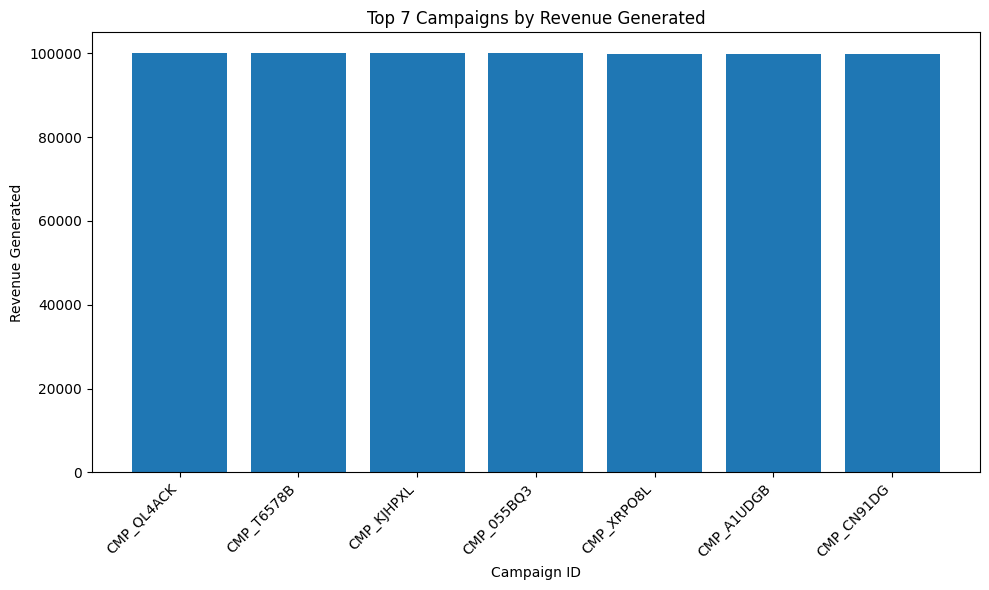

In [22]:
# Select the top 7 campaigns based on revenue
top_7_campaigns = high_revenue_campaigns.head(7)

# Create a bar plot of revenue for the top 7 campaigns
plt.figure(figsize=(10, 6))
plt.bar(top_7_campaigns['Campaign_ID'], top_7_campaigns['Revenue_Generated'])
plt.xlabel('Campaign ID')
plt.ylabel('Revenue Generated')
plt.title('Top 7 Campaigns by Revenue Generated')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

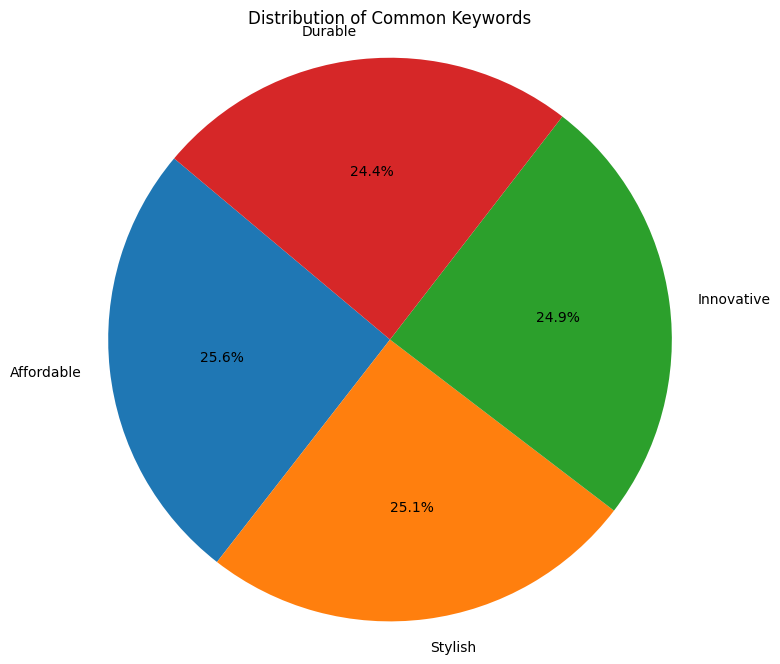

In [23]:
# Count the occurrences of each keyword
keyword_counts = data['Common_Keywords'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(keyword_counts, labels=keyword_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Common Keywords')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [24]:
subscription_tier_counts = data['Subscription_Tier'].value_counts()
print("Distribution of Subscription Tiers:")
print(subscription_tier_counts)

Distribution of Subscription Tiers:
Subscription_Tier
Basic       3416
Standard    3300
Premium     3284
Name: count, dtype: int64


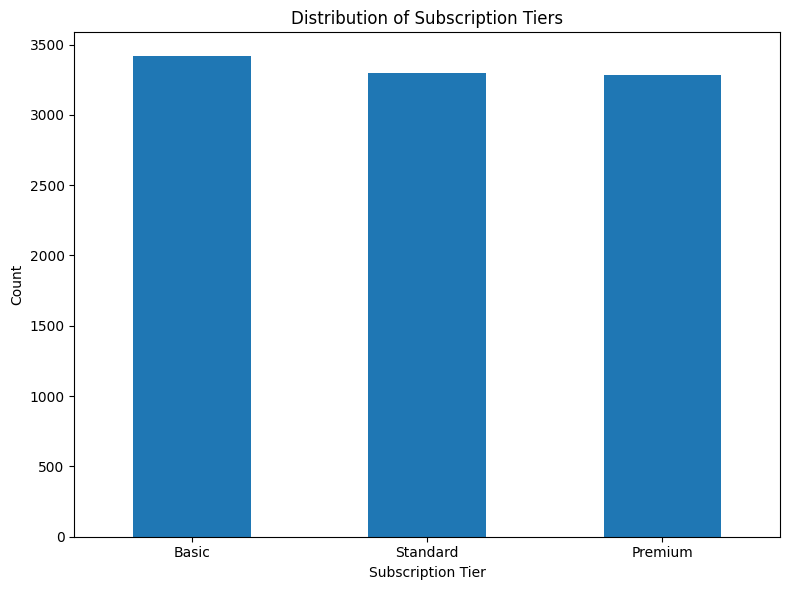

In [25]:

plt.figure(figsize=(8, 6))
subscription_tier_counts.plot(kind='bar')
plt.xlabel('Subscription Tier')
plt.ylabel('Count')
plt.title('Distribution of Subscription Tiers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()